<a href="https://colab.research.google.com/github/Nareshedagotti/RAG/blob/main/Day_2_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Day 2: Data Ingestion & Building the Knowledge Base**

We're diving into what many experts consider the most critical yet most overlooked aspect of RAG systems: data ingestion and knowledge base preparation.

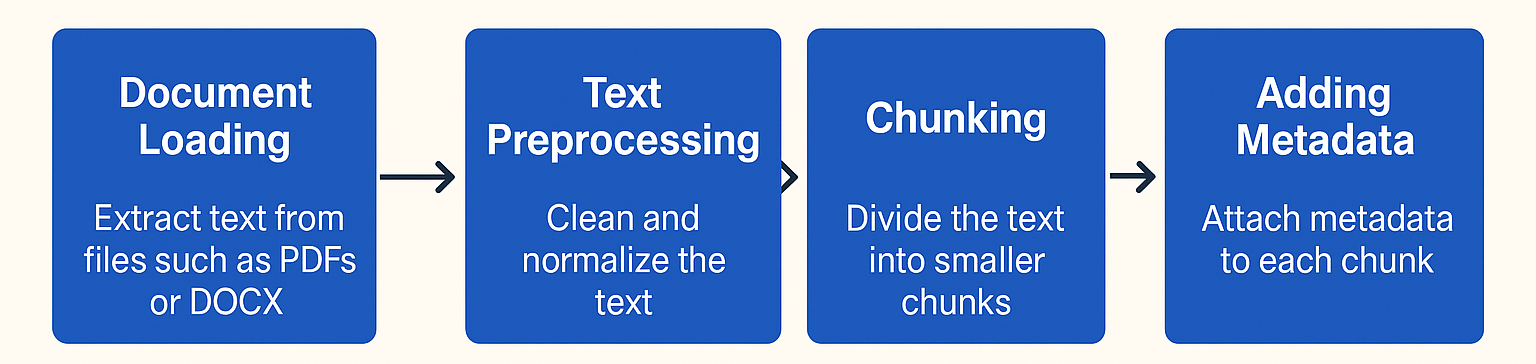

###### **Why Your RAG System Is Only as Good as Your Data Pipeline**

"Garbage in, garbage out" applies more to RAG than almost any other AI system. You could have the most sophisticated retrieval algorithms and the most powerful LLM, but with poorly prepared data, your outputs will disappoint every time.


## **The Complete Data Ingestion Pipeline**


#### **1.Data Sources: What Can You Feed Into RAG?**

**RAG systems can ingest virtually any text-based information:**

* Documents: PDFs, Word docs, PowerPoints, Excel files
* Web content: HTML pages, wikis, knowledge bases
* Databases: SQL, NoSQL records, CSV files
* Communication: Emails, chat logs, support tickets
* Code: Repositories, documentation, comments
* Media transcripts: Meeting recordings, videos, podcasts

### **Text Loaders – Extract Text from 5 Different Sources**

In many real-world applications, you’ll need to extract text data from various file formats. Below are five different types of document loaders implemented using Python — without using LangChain. Each section includes a clear explanation, necessary installation commands, and clean Python code.


##### **1. PDF Text Loader**
**Explanation:**
* PDF files are widely used for documents such as reports, research papers, and books.
* We use the PyPDF2 library to load and read these files.
* The code reads all pages in the PDF and extracts the text using .extract_text().


In [ ]:
!pip install PyPDF2

In [ ]:
#PDF Text Loading
from PyPDF2 import PdfReader

def load_pdf(file_path):
    pdf_reader = PdfReader(file_path)
    text = ""
    for page in pdf_reader.pages:
        text += page.extract_text()
    return text

file_path = "/content/How Vectors.pdf"
pdf_text = load_pdf(file_path)
print(pdf_text)

##### **2. DOCX Text Loader (Microsoft Word)**
**Explanation:**
* DOCX files are commonly used for resumes, letters, and reports.
* We use the python-docx library to read the file.
* The code iterates through all paragraphs and concatenates them into a single string.


In [ ]:
!pip install python-docx

In [ ]:
#Doc text loading
from docx import Document

def load_docx(file_path):
    doc = Document(file_path)
    text = ""
    for paragraph in doc.paragraphs:
        text += paragraph.text + "\n"
    return text

file_path = "/content/Naresh_Edagotti.docx"
docx_text = load_docx(file_path)
print(docx_text)

##### **3. Web Page Text Loader**
**Explanation:**
* Web pages often contain useful information in HTML format.


* We use the requests library to fetch the HTML content and BeautifulSoup to parse and extract clean text.


* The code removes HTML tags and returns only the visible text.


In [ ]:
!pip install requests
!pip install beautifulsoup4

In [ ]:
#web text loader
import requests
from bs4 import BeautifulSoup

def load_web_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    text = soup.get_text()
    return text

url = "https://nareshedagotti.in/"
web_text = load_web_text(url)
print(web_text)

##### **4. Excel and CSV Text Loader**
**Explanation:**
* Excel (.xlsx) and CSV (.csv) files are widely used for structured data.
* We use the pandas library to read both formats.
* The code checks the file extension and uses the appropriate reader (read_excel or read_csv), then converts the DataFrame to a string.


In [ ]:
!pip install pandas

In [ ]:
#Excel and csv text loader
import pandas as pd
def load_excel_csv(file_path):
    df = pd.read_excel(file_path) if file_path.endswith('.xlsx') else pd.read_csv(file_path)
    text = df.to_string(index=False)
    return text
file_path = "/content/AI_Reply_Practice_Categorized.xlsx"
excel_csv_text = load_excel_csv(file_path)
print(excel_csv_text)

##### **5. JSON Text Loader**
**Explanation:**
* JSON is a lightweight format for storing and exchanging structured data.


* Python’s built-in json module can read and parse JSON files.


* The code loads the JSON file and converts it to a readable string using json.dumps.


In [ ]:
#Json text loader
import json
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    text = json.dumps(data, indent=4)
    return text
file_path = "/content/crop.json"
json_text = load_json(file_path)
print(json_text)

#### **2.Cleaning & Preprocessing: The Unsung Hero**
After loading text from various sources like PDF, DOCX, websites, Excel/CSV, and JSON files, the next critical step is text cleaning and preprocessing. This ensures the data is usable for downstream tasks such as search, training, or analysis.

Below is a breakdown of what to clean, why it’s important, and practical code examples.


##### **Why Cleaning is Important**
**Unclean text can cause:**
1. Noise in vectorization or model training (e.g., unnecessary symbols).
2. Inconsistent results due to formatting issues (e.g., line breaks, bullets).
3. Lower performance in tasks like classification, similarity search, and summarization.


##### **Common Cleaning Tasks**

**1. Remove Extra Whitespaces, Tabs, and Newlines**

Unwanted whitespace can interrupt sentence flow.


In [ ]:
def remove_whitespace(text):
    return " ".join(text.split())

cleaned_text = remove_whitespace(text)

**2. Remove Special Characters and Symbols**

Special characters may not carry semantic value and can clutter the text.


In [ ]:
import re

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)
cleaned_text = remove_special_characters(cleaned_text)

**3. Lowercase the Text**

Helps normalize the text for matching, tokenizing, and embedding.


In [ ]:
def to_lowercase(text):
    return text.lower()
cleaned_text = to_lowercase(cleaned_text)

**4. Remove Stopwords (Optional but useful in NLP)**

Stopwords like "and", "the", "is" can be removed to reduce noise.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
def remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered_tokens)
cleaned_text = remove_stopwords(cleaned_text)

In [ ]:
import re

def clean_text(text):
    text = re.sub(r"Page \d+ of \d+", "", text)  # Remove page numbers
    text = re.sub(r"http\S+|www\S+", "", text)   # Remove URLs
    text = re.sub(r"\S+@\S+", "", text)          # Remove emails
    text = re.sub(r"\s+", " ", text)             # Normalize whitespace
    text = re.sub(r"(Confidential|Disclaimer).*", "", text, flags=re.IGNORECASE)
    return text.strip()

cleaned_pdf = clean_text(web_text)
print(cleaned_pdf)

#### **3.Chunking Strategies – Breaking Large Text into Meaningful Parts**

Once the text is cleaned and preprocessed, the next important step is chunking. Large documents can’t be processed all at once by many models (especially LLMs) due to token limits. So we divide them into smaller, manageable "chunks" of text.

##### **Why Chunking is Necessary**

1. Overcome model token limits – LLMs like GPT have token limits (e.g., 4096 or 8192 tokens).
2. Improve semantic understanding – Chunking preserves context better than sentence-level processing.
3. Enable retrieval-augmented generation (RAG) – For vector search or QA systems.

##### **What to Consider Before Chunking**

When preparing text data for chunking, it's important to consider several key factors to ensure that the resulting chunks are meaningful and maintain context.

**Here are the main points to keep in mind:**

**Chunk Size:**
Decide how large each chunk should be. This is typically measured in characters or tokens. The ideal size balances between being small enough for processing and large enough to retain context.

**Overlap:**
Determine whether you need an overlap between chunks. Adding some overlap (e.g., 100–200 characters) helps preserve context, especially when splitting long-form text like articles or documents.

**Separator:**
Choose how you want to split the text—by fixed character length, by sentences, or by paragraphs. Chunking by logical separators (like sentences or paragraphs) often leads to more coherent and meaningful chunks.

**Format Awareness:**
Maintain structural elements where necessary. For example, section titles, headings, bullet points, or numbered lists should be kept intact. This helps retain the logical flow and structure of the original document.

**1. Fixed-Size Character-Based Chunking**

Divides text into fixed character lengths with optional overlap.

In [ ]:
def character_chunking(text, chunk_size=1000, overlap=200):
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunks.append(text[start:end])
        start += chunk_size - overlap
    return chunks

chunks = character_chunking(pdf_text)
print(f"Total Chunks: {len(chunks)}")
print(pdf_text)

**2. Sentence-Based Chunking**

Divides text by sentences and groups them until the chunk size is met.


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

def sentence_chunking(text, max_chars=1000):
    sentences = sent_tokenize(text)
    chunks = []
    current_chunk = ""

    for sentence in sentences:
        if len(current_chunk) + len(sentence) <= max_chars:
            current_chunk += " " + sentence
        else:
            chunks.append(current_chunk.strip())
            current_chunk = sentence
    if current_chunk:
        chunks.append(current_chunk.strip())
    return chunks

chunks = sentence_chunking(final_cleaned_text)
print(f"Total Chunks: {len(chunks)}")

**3. Paragraph-Based Chunking**

Ideal when paragraphs carry logical structure (e.g., articles, reports).


In [ ]:
def paragraph_chunking(text, max_chars=1000):
    paragraphs = text.split('\n\n')
    chunks = []
    current_chunk = ""

    for para in paragraphs:
        if len(current_chunk) + len(para) <= max_chars:
            current_chunk += para + "\n\n"
        else:
            chunks.append(current_chunk.strip())
            current_chunk = para + "\n\n"
    if current_chunk:
        chunks.append(current_chunk.strip())
    return chunks

chunks = paragraph_chunking(final_cleaned_text)
print(f"Total Chunks: {len(chunks)}")

**4. Line-Based Chunking**

Sometimes used for line-by-line analysis or transcript processing.


In [ ]:
def line_chunking(text, max_lines=10):
    lines = text.splitlines()
    chunks = []
    for i in range(0, len(lines), max_lines):
        chunk = "\n".join(lines[i:i+max_lines])
        chunks.append(chunk)
    return chunks

chunks = line_chunking(final_cleaned_text)
print(f"Total Chunks: {len(chunks)}")

### **4️.Understanding Metadata in Document Processing**

Metadata refers to additional information associated with a document or its chunks that provides context beyond just the raw text. It plays a crucial role in improving the performance, relevance, and traceability of document-based applications.


##### **What is Metadata?**
Metadata is data about data. In text processing pipelines, it may include:

* File name or title


* Source (path or URL)


* Page number (for PDFs)


* Document type


* Creation or modification date


* Chunk index or character range


* Tags or categories

##### **Why Metadata Matters**

* **Improved Filtering and Retrieval**
 Enables targeted search based on document type, date, or file name.


* **Better Context for LLMs**
 Helps provide meaningful responses by identifying document structure or origin.


* **Source Traceability**
 Ensures that outputs can be tracked back to specific parts of the source.


* **Organized Indexing**
 Essential when storing vectors in vector databases like FAISS, Chroma, or Pinecone.

##### **What Happens Without Metadata?**
* Lack of filtering and relevance in search


* Hard to explain or trace LLM outputs


* Reduced model performance due to missing context


* No way to debug or audit responses

##### **How to Add Metadata**
Let’s enhance the chunks created earlier (from Part 3) by adding metadata such as file name, chunk index, and character positions.


In [ ]:
def add_metadata_to_chunks(chunks, file_name):
    chunks_with_metadata = []
    for idx, chunk in enumerate(chunks):
        start_char = idx * (1000 - 200)
        end_char = start_char + len(chunk)
        chunk_data = {
            "text": chunk,
            "metadata": {
                "file_name": file_name,
                "chunk_index": idx,
                "start_char": start_char,
                "end_char": end_char,
                "char_count": len(chunk)
            }
        }
        chunks_with_metadata.append(chunk_data)
    return chunks_with_metadata

# Apply metadata function
chunks_with_meta = add_metadata_to_chunks(chunks, "How_Vectors.pdf")

# Preview first chunk with metadata
print("Text Preview:", chunks_with_meta)
print("Metadata:", chunks_with_meta[3]['metadata'])

##### **Why Can't We Just Convert Entire Documents to Embeddings?**

Imagine you're building a library system. If you only cataloged entire books (not chapters or sections), then when someone asks for information about "photosynthesis":

* You'd have to retrieve entire biology textbooks (1000+ pages)
* The searcher would need to manually scan these books to find relevant sections
* Many books with brief mentions would score similarly to books with detailed chapters

**Similarly, with RAG:**

**Relevance Dilution:** A 50-page document might have only one relevant paragraph. When embedded as a whole, that signal gets diluted.

**Context Window Limitations:** LLMs have token limits (4K-32K). Whole documents often exceed these limits.

**Retrieval Granularity:** You want to retrieve the most specific, relevant information - not entire documents.

**Vector Similarity Issues:** Longer texts create "averaged out" embeddings that lose specificity.

##### **Common Chunking Mistakes That Kill RAG Performance**

**Mistake 1:** One-size-fits-all chunking Different document types need different strategies. Legal contracts need semantic chunking by clauses, while news articles might work better with fixed-size chunks.

**Mistake 2:** Ignoring document structure Headers, sections, and hierarchies contain valuable context. Don't blindly chunk across these boundaries.

**Mistake 3:** No chunk overlap Without overlap, you risk splitting critical context across chunks. Key information that spans chunk boundaries gets fragmented.

**Mistake 4:** Neglecting metadata Chunks without metadata are like books without a catalog system - technically available but practically unfindable.